# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


The company wants to know:

-   Which variables are significant in predicting the demand for shared bikes.
-   How well those variables describe the bike demands.


#### Business Goal:
> Business Goal is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Import the required library

In [1407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [1408]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading, Understanding and Cleaning the Data

In [1409]:
# Reading data from csv file
bike_sharing_df = pd.read_csv('day.csv')

# Check the head of the dataset
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspect of bike sharing data frame

In [1410]:
# Check shape of the dataset
bike_sharing_df.shape

(730, 16)

In [1411]:
# Check detail info of dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1412]:
# Checking stats of the dataset
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Check missing value for rows and columns

In [1413]:
# Checking null values on row basis
bike_sharing_df.isnull().sum(axis=1)


0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [1414]:
# Checking null values on column basis
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1415]:
# Check for duplicatele records and drop if any

print('Total records - {} '.format(len(bike_sharing_df.value_counts())))

print('Total duplicate - {} '.format(len(bike_sharing_df[bike_sharing_df.duplicated()])))


Total records - 730 
Total duplicate - 0 


In [1416]:
# Remove instant (just an index) column as it is not useful for analysis
bike_sharing_df.drop(['instant'], axis=1, inplace=True)

# Let's drop dteday column as we have mnth and yr in separate columns and it is not useful for analysis at this moment
bike_sharing_df.drop(['dteday'], axis=1, inplace=True)

# Let's drop casual and registered column as cnt is the total of casual and registered users (according to document)
bike_sharing_df.drop(['casual', 'registered'], axis=1, inplace=True)

##### Convert columns - season, mnth, weekday and weathersit to categorical variable as advised in the problem statement

In [1417]:
# Convert season
print(bike_sharing_df.season.unique())
season_var = ['season']

# Defining the map function for season
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to season
bike_sharing_df[season_var] = bike_sharing_df[season_var].apply(season_map)
print(bike_sharing_df.season.unique())

# Check if values are replaced
print(bike_sharing_df[season_var].value_counts())

[1 2 3 4]
['spring' 'summer' 'fall' 'winter']
season
fall      188
summer    184
spring    180
winter    178
dtype: int64


In [1418]:
# Convert mnth
print(bike_sharing_df.mnth.unique())

# Replace mnth
bike_sharing_df['mnth'].replace({1:"January",2:"Feb",3:"March",4:"April",5:"May",6:"June",7:"July", 8:"August",9:"September", 10:"October",11:"November", 12:"December"},inplace=True)


# Check if values are replaced
print(bike_sharing_df[['mnth']].value_counts())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
mnth     
August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
Feb          56
dtype: int64


In [1419]:
# Convert weekday
print(bike_sharing_df.weekday.unique())
weekdayVar = ['weekday']

# Defining the map function for weekday
def weekday_map(x):
    return x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4: 'Thursday', 5:'Friday', 6: 'Saturday'})

# Applying the function to weekday
bike_sharing_df[weekdayVar] = bike_sharing_df[weekdayVar].apply(weekday_map)
print(bike_sharing_df.weekday.unique())

# Check if values are replaced
print(bike_sharing_df[weekdayVar].value_counts())

[6 0 1 2 3 4 5]
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
weekday  
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
dtype: int64


In [1420]:
# Convert weatherlist
print(bike_sharing_df.weathersit.unique())
weathersitVar = ['weathersit']

# Defining the map function for weathersit

def weathersit_map(x):
    return x.map(
        {
            1: 'Clear_Few-clouds',
            2: 'Mist-Cloudy_Mist-Broken',
            3: 'Light-Snow_Light-Rain-Thunderstorm',
            4: 'Heavy-Rain-Ice-Pallets-Thunderstorm'
        })

# Applying the function to weathersit
bike_sharing_df[weathersitVar] = bike_sharing_df[weathersitVar].apply(weathersit_map)
print(bike_sharing_df.weathersit.unique())

# Check if values are replaced
print(bike_sharing_df[weathersitVar].value_counts())

[2 1 3]
['Mist-Cloudy_Mist-Broken' 'Clear_Few-clouds'
 'Light-Snow_Light-Rain-Thunderstorm']
weathersit                        
Clear_Few-clouds                      463
Mist-Cloudy_Mist-Broken               246
Light-Snow_Light-Rain-Thunderstorm     21
dtype: int64


In [1421]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

-  See if there is some obvious multicollinearity going on

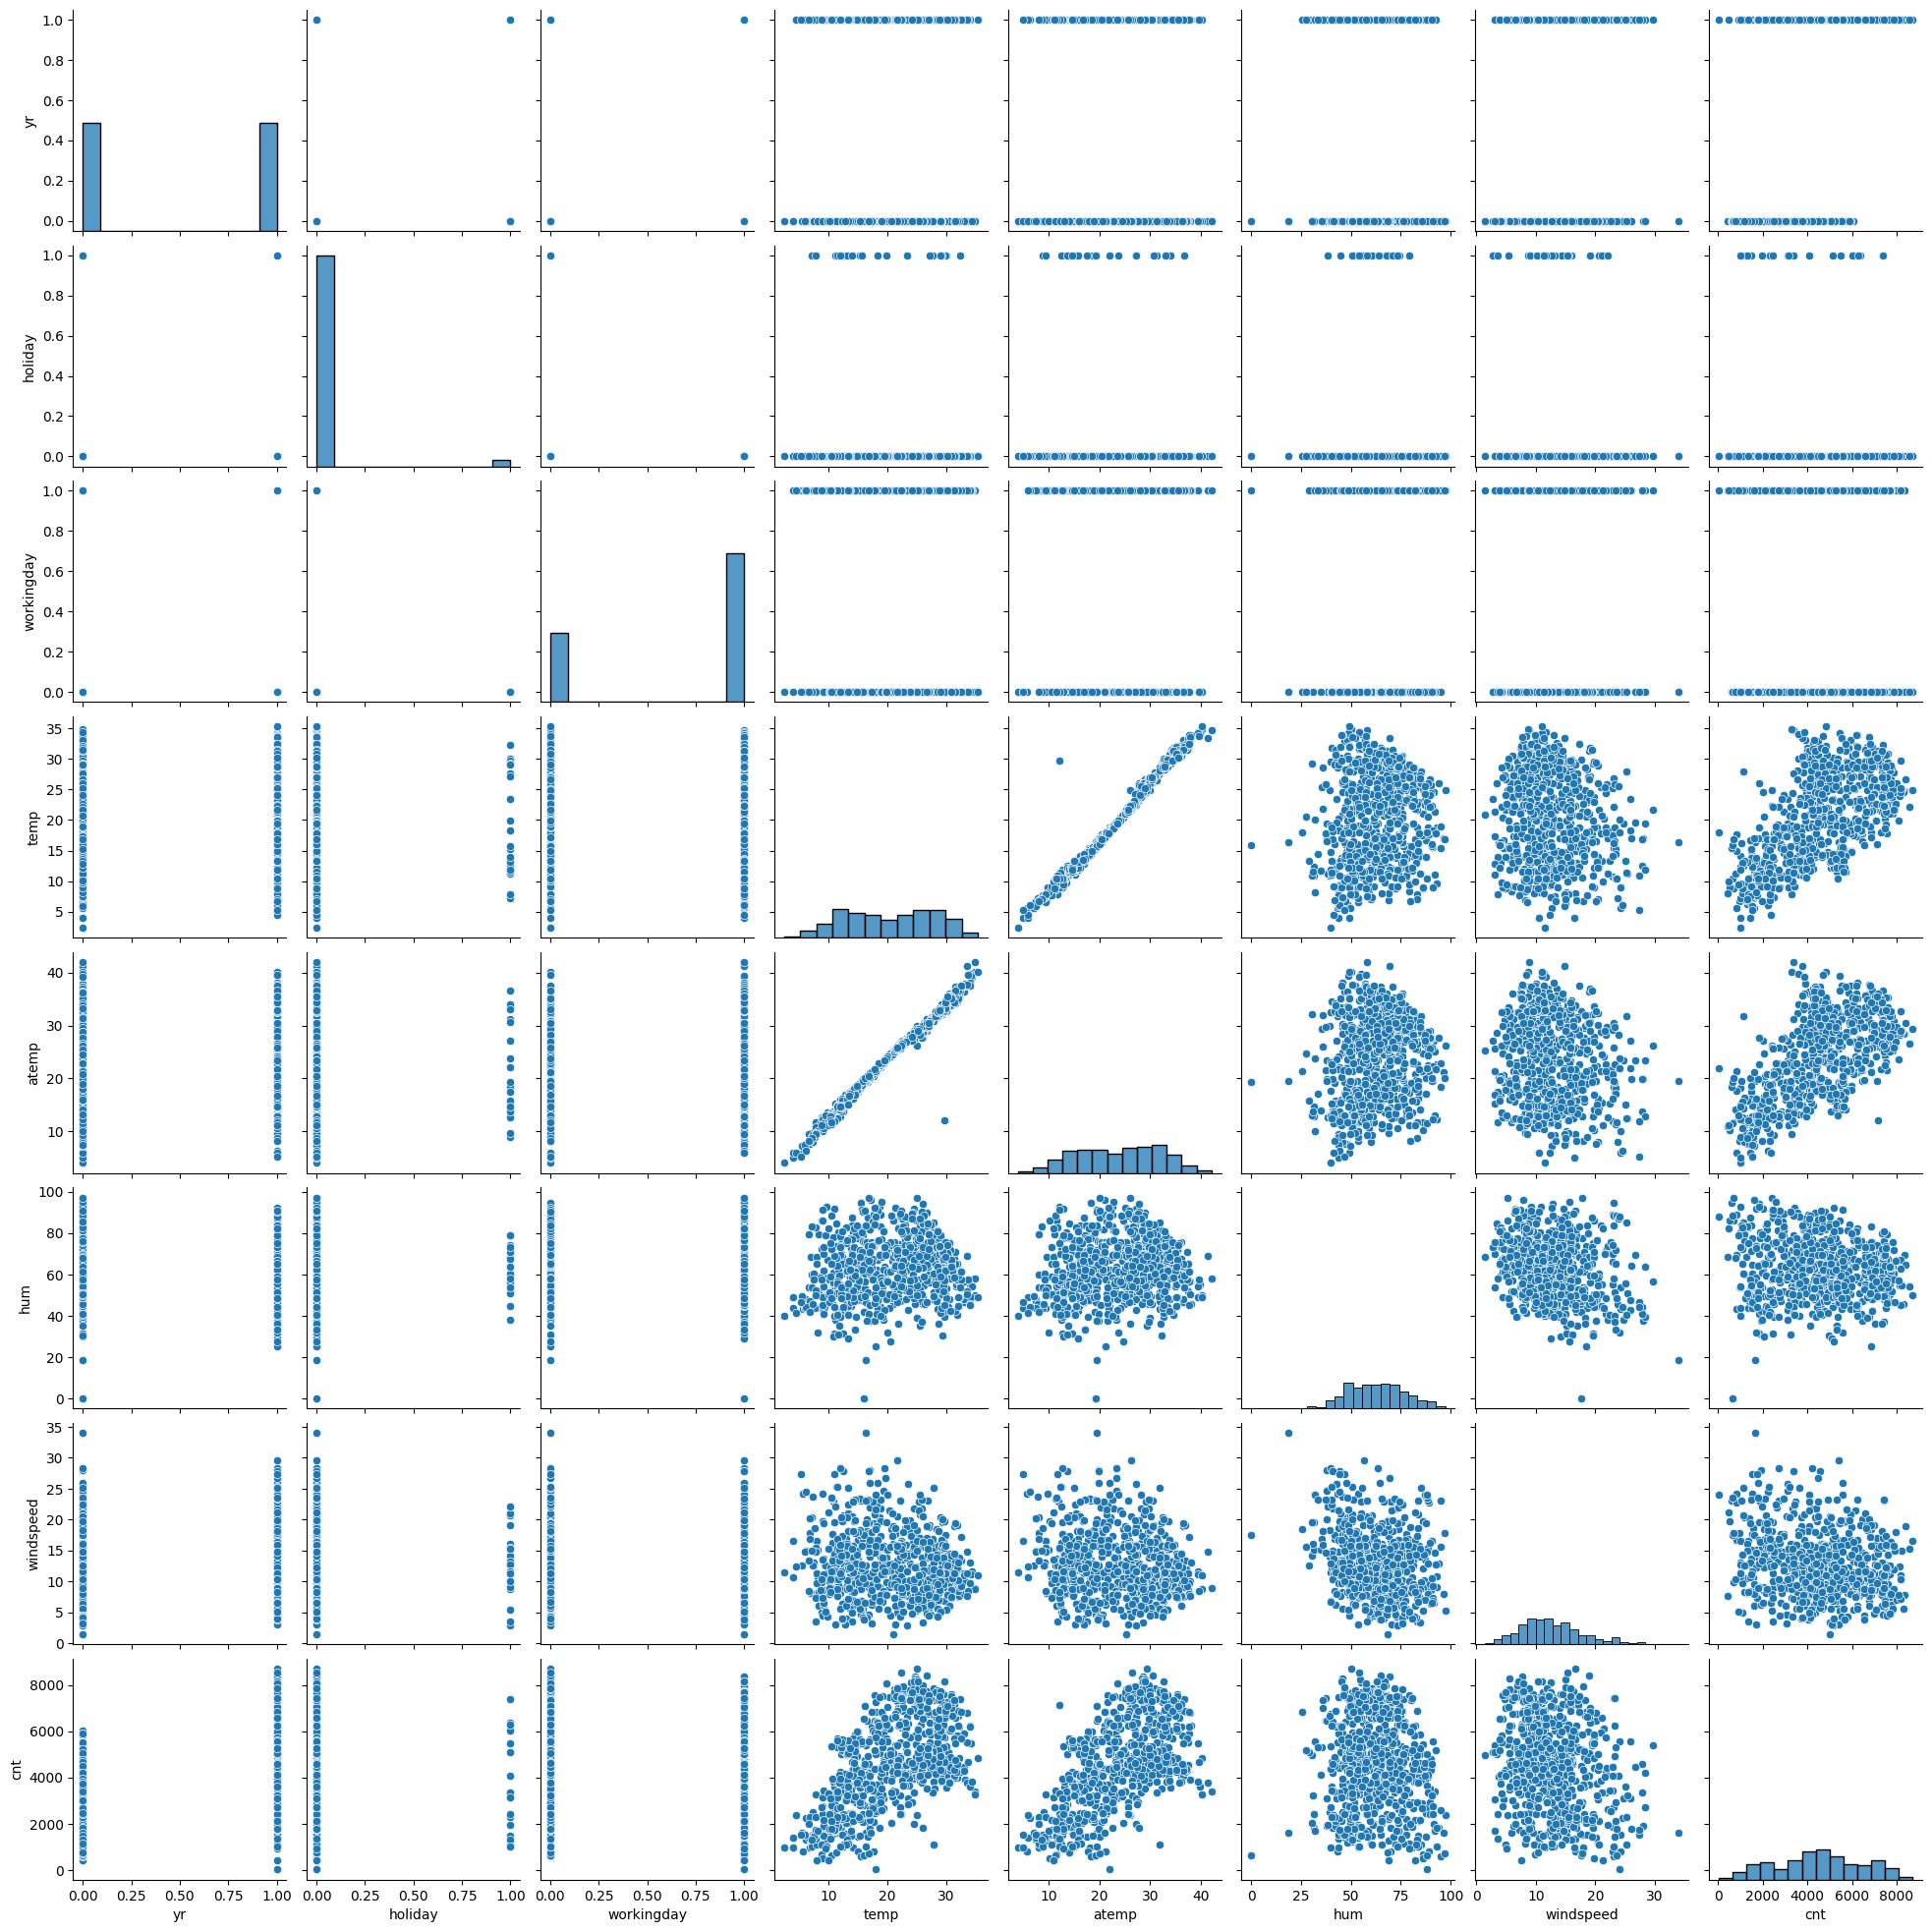

In [1422]:
# Make a Pair plot for all the varaibles
sns.pairplot(bike_sharing_df)
plt.show()

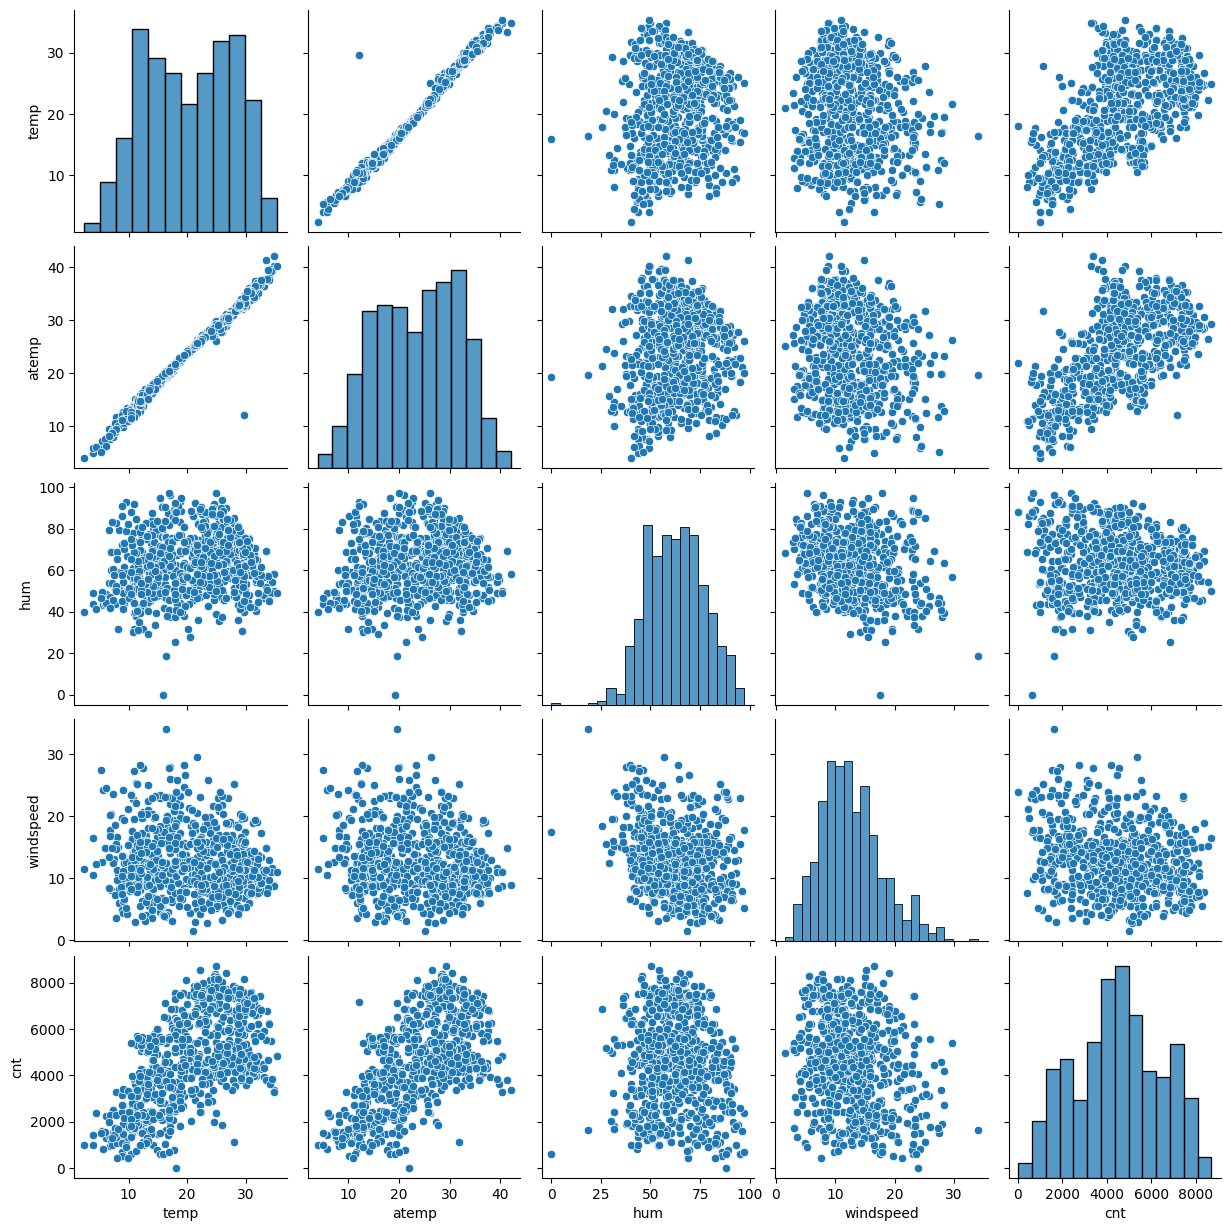

In [1423]:
# Let's make a pairplot of all the numeric variables and exculde the boolean variable those have value with [0 and 1] only
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.pairplot(bike_sharing_df[numeric_variables])
plt.show()

#### Observation : 
          temp and atemp are highly correlated with cnt


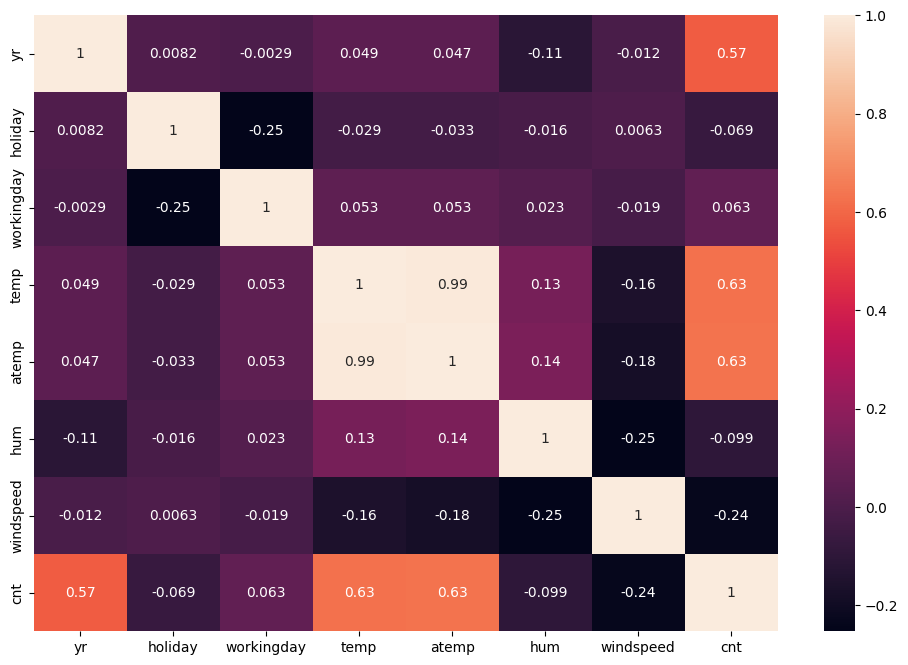

In [1424]:
# Draw a heatmap to check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(bike_sharing_df.corr(), annot=True)
plt.show()

In [1425]:
# As we can see from heatmap the correlation between temp and atemp are highly co-related. So, let's drop one column as multicollinearity going on.

# drop atemp column

bike_sharing_df.drop(['temp'], axis=1, inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist-Cloudy_Mist-Broken,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist-Cloudy_Mist-Broken,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few-clouds,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few-clouds,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few-clouds,11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

As we have some categorical variables as well. Let's make box plot for them.

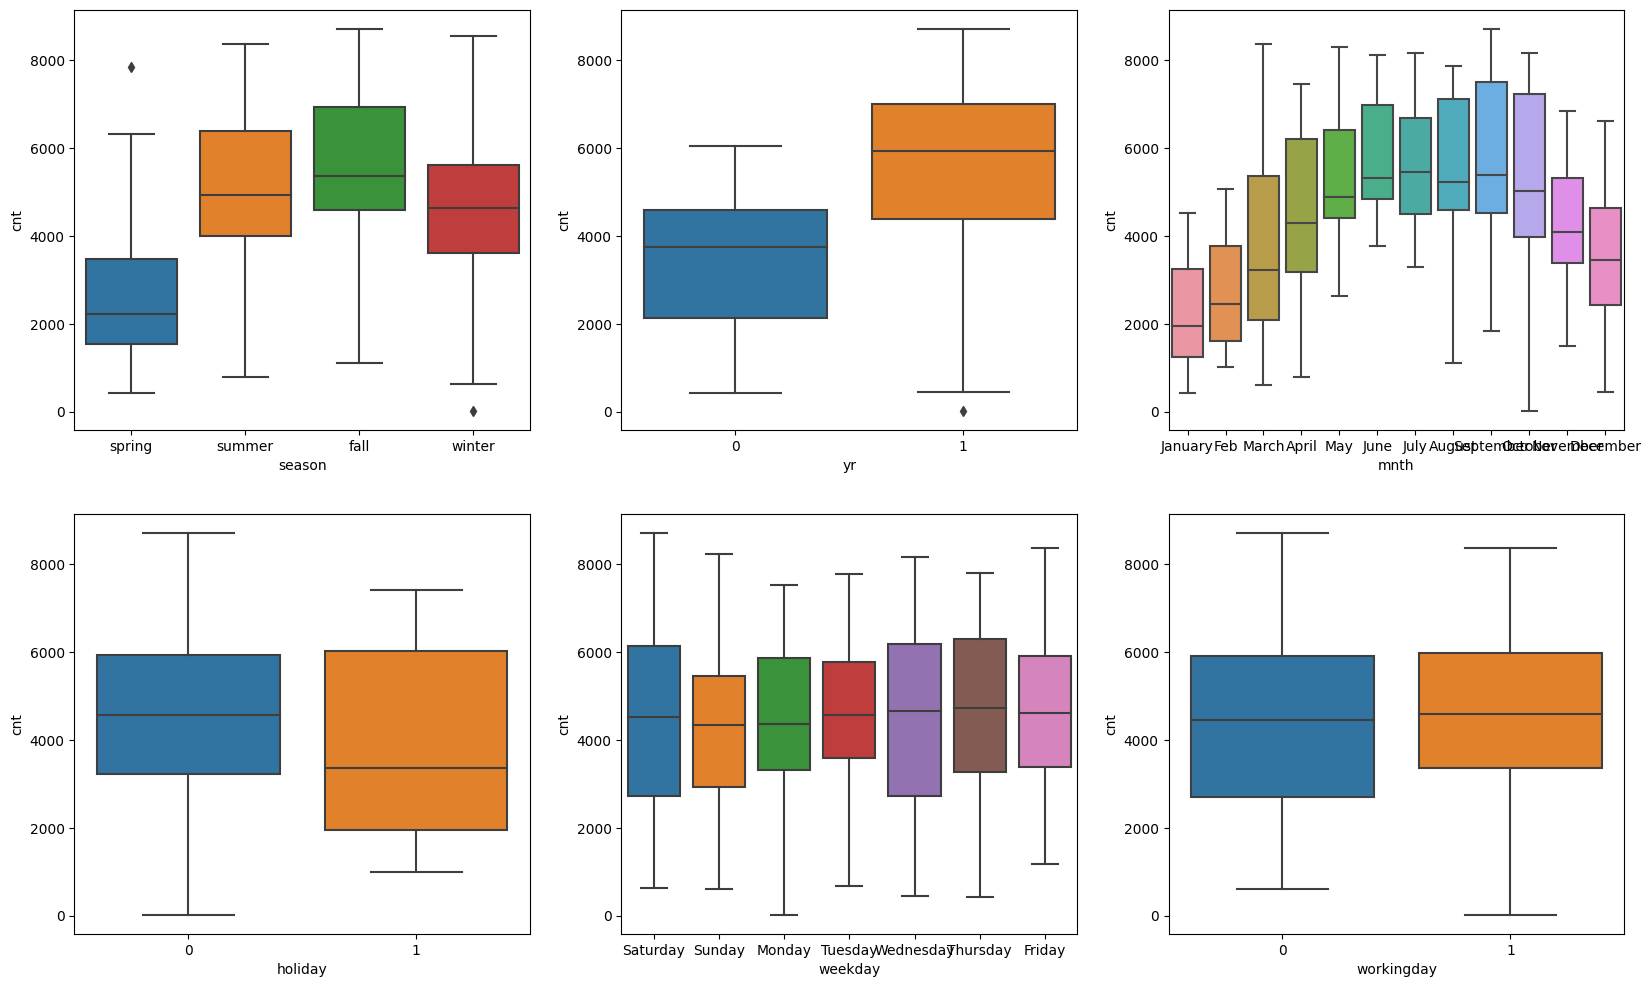

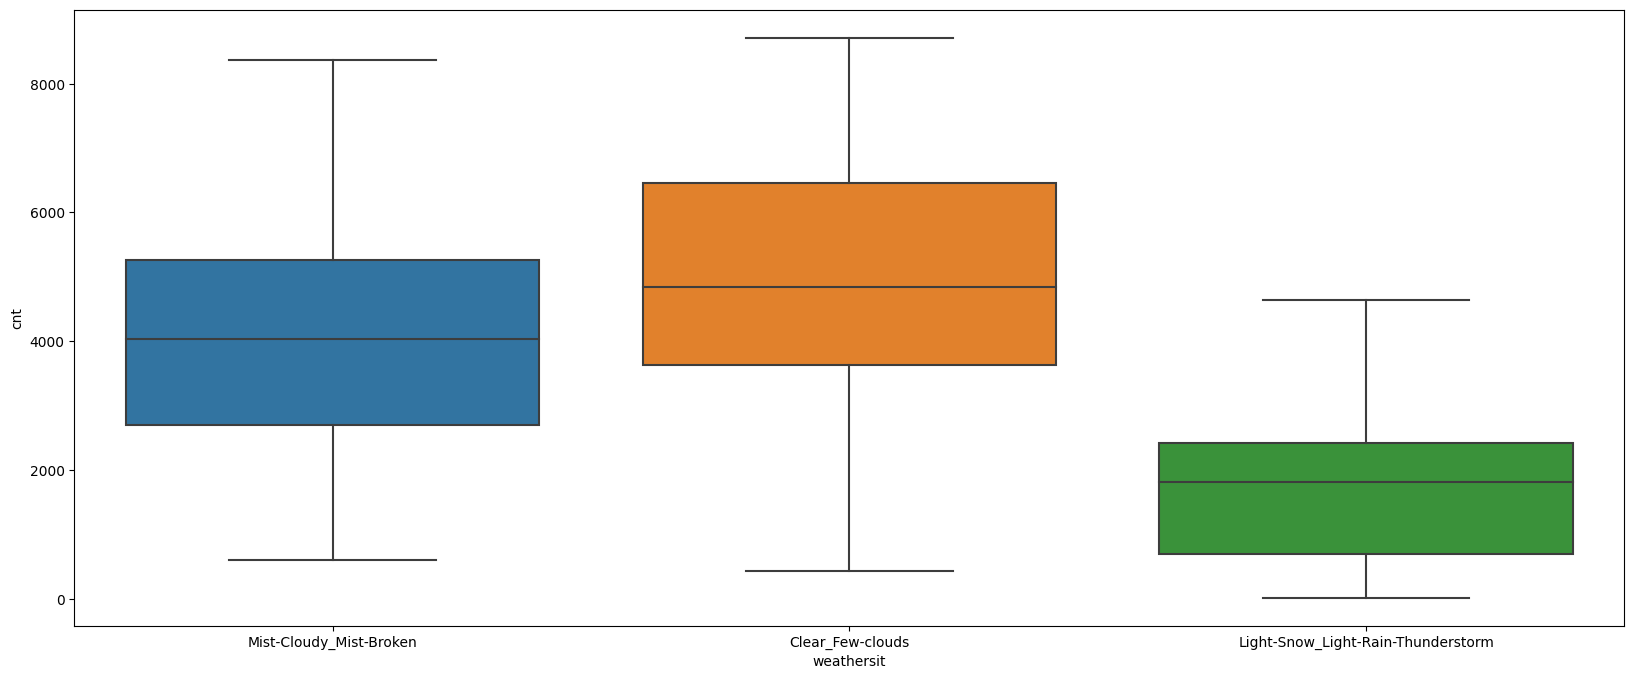

In [1426]:
# Let's take a subplot with 2 rows and 3 columns to visulise the categorical variables

plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_sharing_df)

plt.subplot(2,3,2)
# plt.xticks([0,1], ["2018", "2019"])
sns.boxplot(x='yr', y='cnt', data=bike_sharing_df)

plt.subplot(2,3,3)
# plt.xticks(rotation=45)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing_df)

plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing_df)

plt.subplot(2,3,5)
# plt.xticks(rotation=45)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing_df)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing_df)

# let's take weathersit into different subplot as it has big x labels.
plt.figure(figsize=(20, 8))
plt.subplot(1,1,1)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_df)

plt.show()

#### Observations
-   Demand is low in spring and high in fall season
-   Demand was high in 2019 and low in 2018
-   Demand was high in month of August, Sepember, Octocer and low in Januray
-   Weekend and holidays day has high demand
-   Day wise we don't see much change on demand
-   Workingdays wise we don't see much change on demand
-   weathersit - 
    -   High demand with - "Clear, Few clouds" 
    -   low demand with "Light Snow, Light Rain"

## Step 3: Data Preparation

#### Dummy variables

In [1427]:
# let's check the shape before getting started
print(bike_sharing_df.shape)

(730, 11)


In [1428]:
# Create a list of those columns where we want to create dummies
dummy_columns_list = ['season', 'mnth', 'weekday', 'weathersit']

# Create the dummies for the above columns
dummies = pd.get_dummies(bike_sharing_df[dummy_columns_list], drop_first=True)

# Concatnate the dummies with original dataset
bike_sharing_df = pd.concat([bike_sharing_df, dummies], axis=1)

# Drop the original columns after creating dummies
bike_sharing_df.drop(dummy_columns_list, axis=1, inplace=True)

# let's check the column after creating dummies
print(bike_sharing_df.columns)
bike_sharing_df.head()


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_Feb', 'mnth_January', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1429]:
# let's check the shape of dataset after creating dummy variables
print(bike_sharing_df.shape)

(730, 29)


## Step 4: Splitting the Data into Training and Testing Sets

In [1430]:
# Splitting the data into train and test set assigning it the different variables
df_train, df_test = train_test_split(bike_sharing_df, train_size=0.7, test_size=0.3, random_state=100)

#Check the shape of train and test set
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [1431]:
# let's see the data of train data set

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1432]:
# let's see the data of test data set

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Rescaling the Features

As we know scaling doesn't impact our model. So, let's scale the numeric columns to have comparable scale.

-   Min-Max scaling (normalisation) - Between 0 and 1 (Preffered way as it take care the outliers)

In [1433]:
# Instantiating scaler object

scaler = MinMaxScaler()

In [1434]:
# Apply scaler() to all the columns except theose contains 0 or 1 value

# Find the columns those does not have 0 or 1 value
columns_to_scale = bike_sharing_df.loc[:, (~bike_sharing_df.isin([0,1]).all())].columns
print(columns_to_scale)

# Create a list of variables to scale
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# fit_transform to train data set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# fit() - learns xmin and xmax
# transform() - computes (x-xmin)/(xmax-xmin)
# fit_transform() - does the both fit and transform

Index(['atemp', 'hum', 'windspeed', 'cnt'], dtype='object')


In [1435]:
# Check train dataset after scalling
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


-   We can see above that all the values are converted between 0 and 1

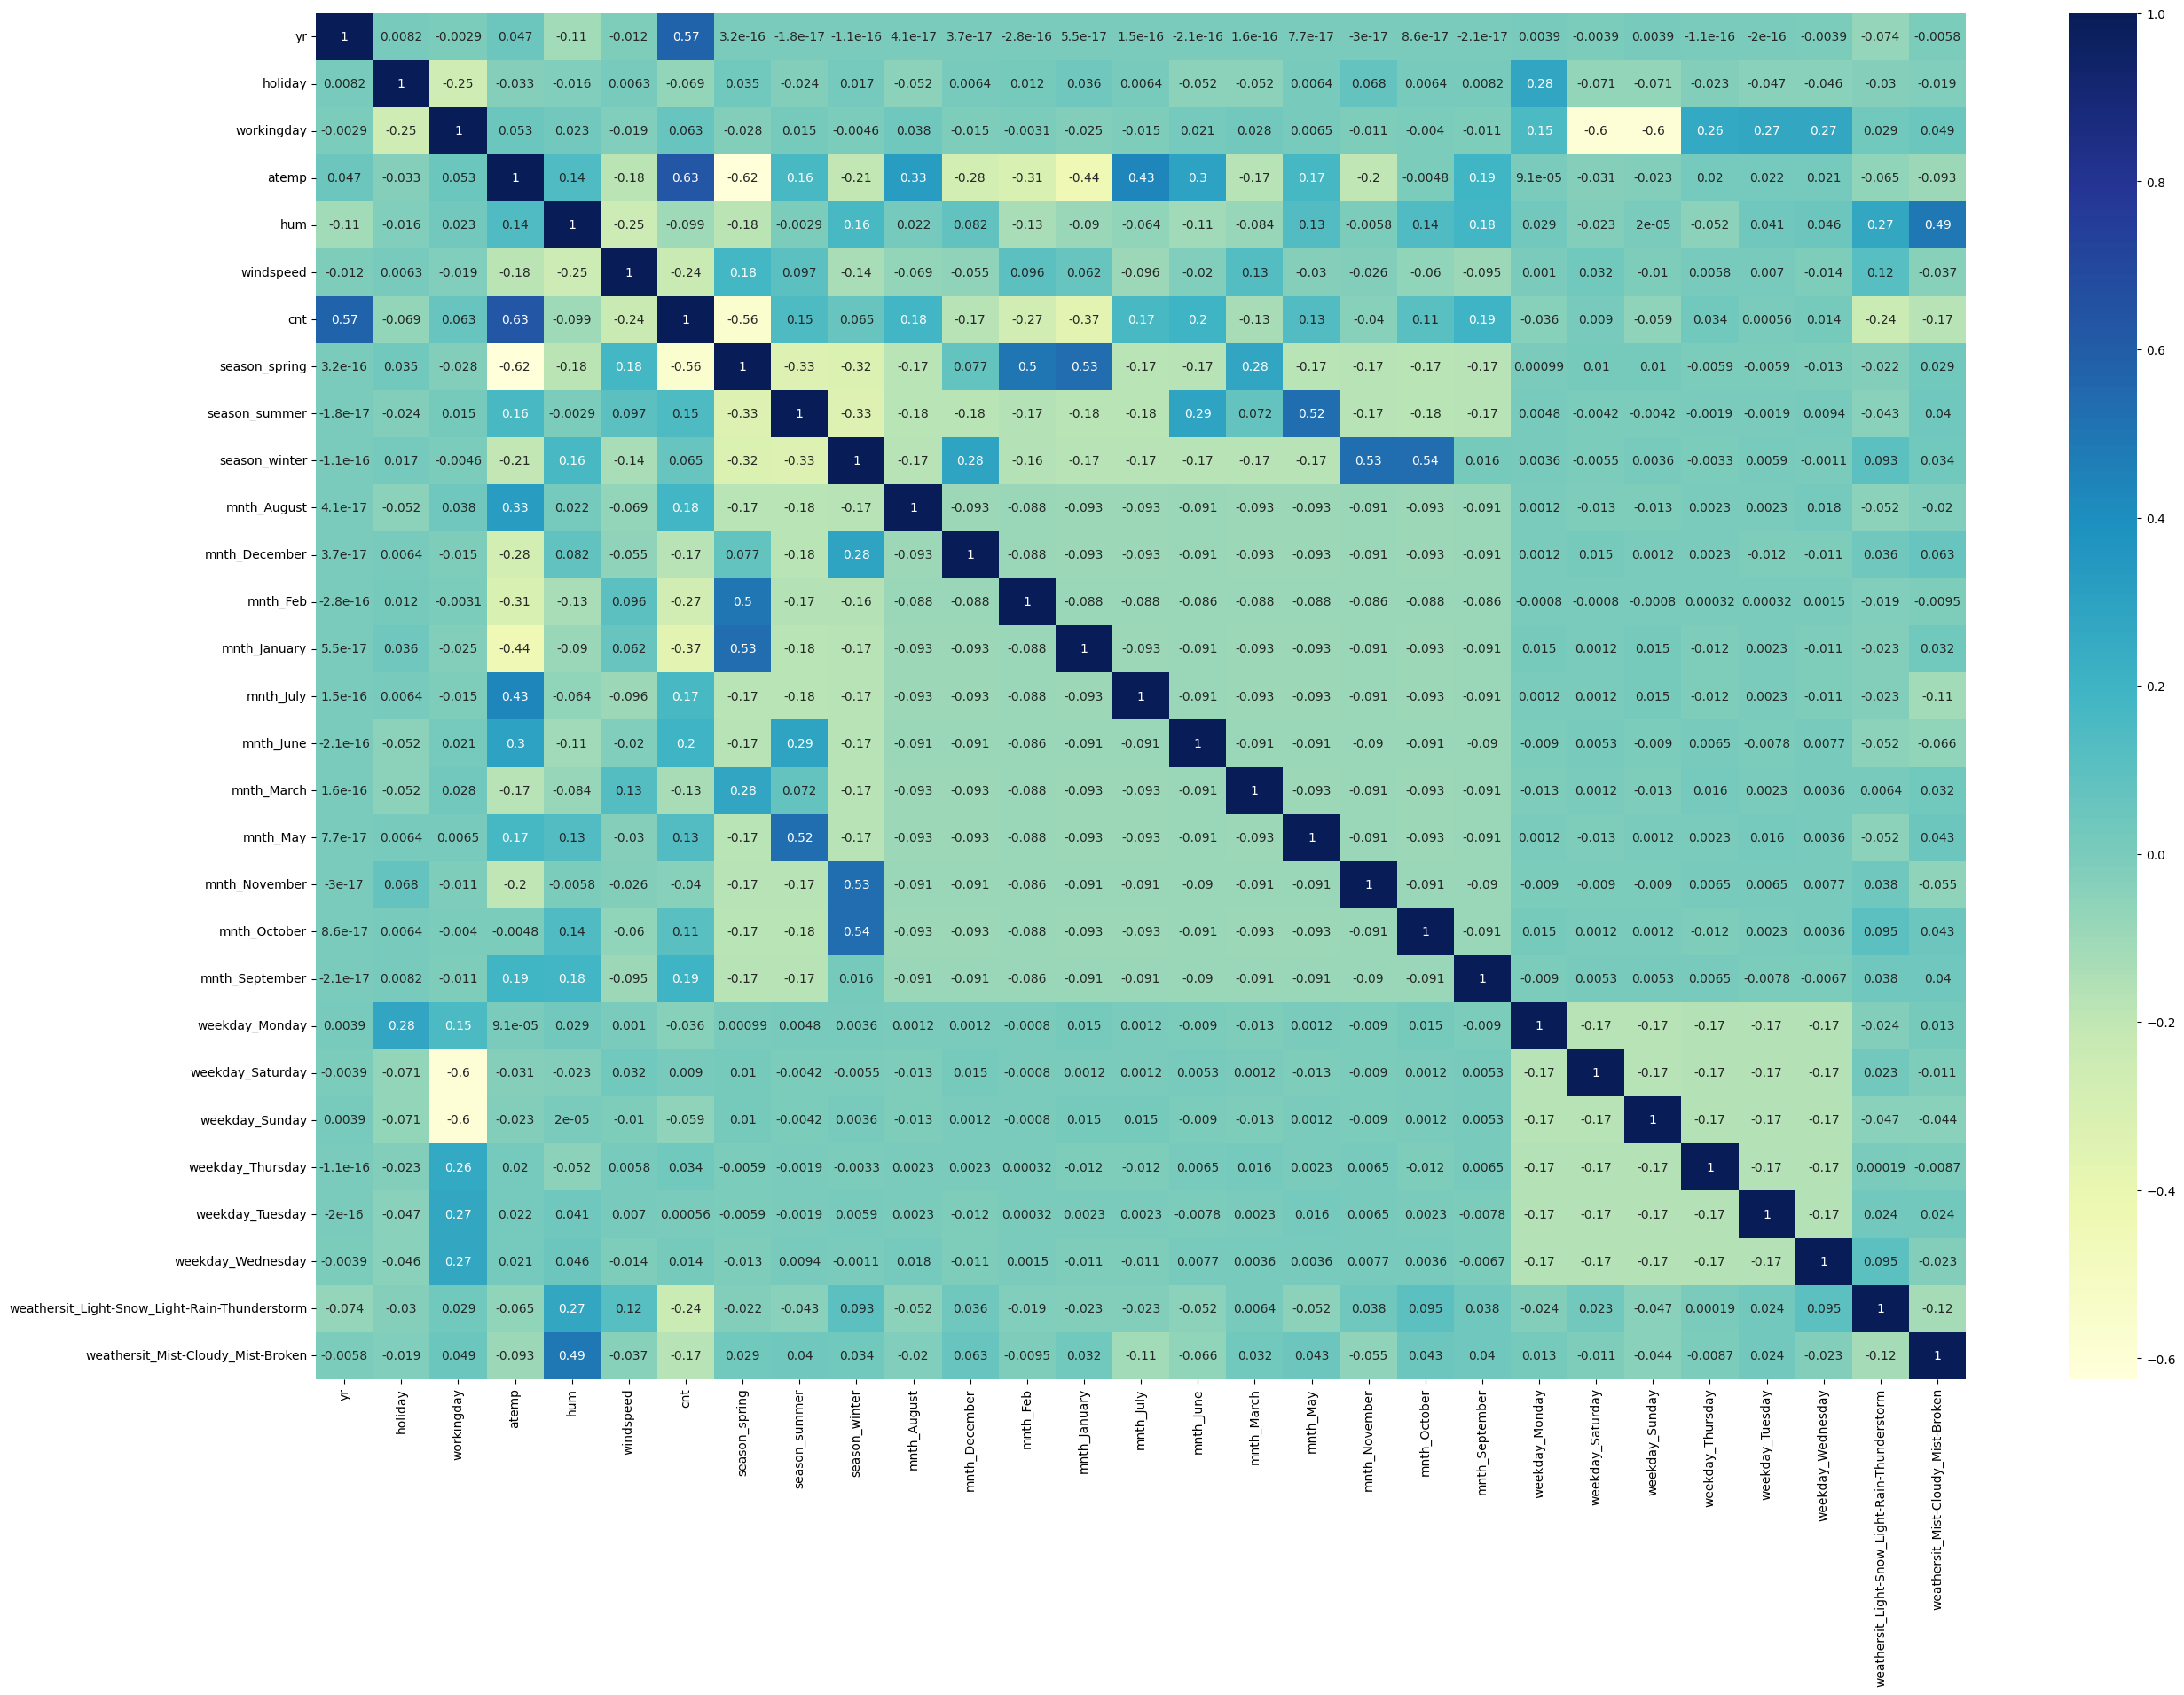

In [1436]:
# Let's check the correlation coefficients for all variables to see which variables are highly correlated

plt.figure(figsize = (30, 20))
# plt.xticks(rotation=45)
sns.heatmap(data=bike_sharing_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

Observattion
-   atemp is highly correlated with cnt

Let's see a scatter for `atemp` vs `cnt`.

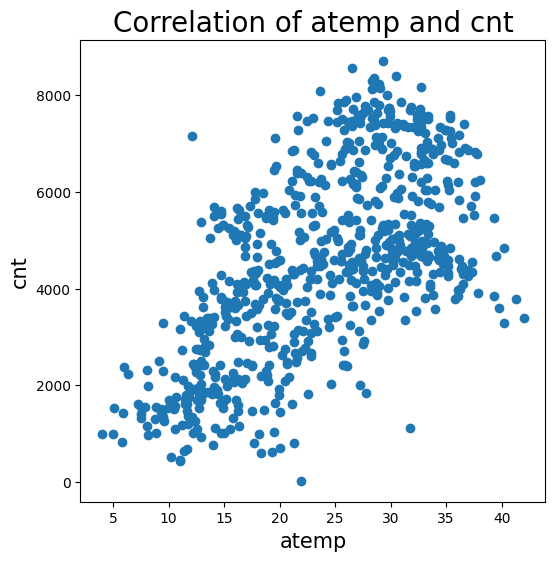

In [1437]:
# Draw a scatter plot
plt.figure(figsize=[6,6])
plt.scatter(bike_sharing_df.atemp, bike_sharing_df.cnt)
plt.title('Correlation of atemp and cnt', fontsize = 20)                  # Plot heading 
plt.xlabel('atemp', fontsize = 15)  
plt.ylabel('cnt', fontsize = 15) 
plt.show()

### Dividing into X and Y sets for the model building

In [1438]:
# Let's create x and y train from df_train set

y_train = df_train.pop('cnt')
X_train = df_train

# Check the shape of X and y train dataset
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


## Step 5: Building a linear model

As we know there are three way to start with -

-   Forward approach                        - start with one variable and keep adding
-   Backward approach                       - Add all the variables and remove one by one
-   RFE - Recursive feature elimination     - Select the variable based on significance


As we have 28 variable in the dataset and going with forward or backward approach would be time consuming. So let's use RFE to select the significant variables.



In [1439]:
# Running RFE with the output number of the variable equal to 15

# Create object of lm
lm = LinearRegression()

# Fit x_train and y_train to lm object
lm.fit(X_train, y_train)


# running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_August', False, 7),
 ('mnth_December', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 8),
 ('mnth_March', False, 14),
 ('mnth_May', False, 5),
 ('mnth_November', False, 2),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light-Snow_Light-Rain-Thunderstorm', True, 1),
 ('weathersit_Mist-Cloudy_Mist-Broken', True, 1)]

In [1440]:
# Extracting the high significants columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_January', 'mnth_July',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [1441]:
# Let's check the list of insignificant columns
X_train.columns[~rfe.support_]

Index(['season_summer', 'mnth_August', 'mnth_December', 'mnth_Feb',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### MODEL 1

In [1442]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1443]:
# Adding a constant variable to the x train dataset
X_train_sm = sm.add_constant(X_train_rfe)

In [1444]:
# Running the linear model by providing y and x train dataset
lm = sm.OLS(y_train, X_train_sm).fit()

# let's check the parameters of lm
lm.params

const                                            0.253490
yr                                               0.232502
holiday                                         -0.002506
workingday                                       0.096557
atemp                                            0.476051
hum                                             -0.144868
windspeed                                       -0.161522
season_spring                                   -0.104264
season_winter                                    0.045799
mnth_January                                    -0.039818
mnth_July                                       -0.069934
mnth_September                                   0.062586
weekday_Saturday                                 0.106578
weekday_Sunday                                   0.052861
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.248391
weathersit_Mist-Cloudy_Mist-Broken              -0.059373
dtype: float64

In [1445]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.66e-188
Time:                        14:54:04   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Observation :

-   R-squared is high and good for prediction
-   p-value close to 0 is good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good

Looking at the p-values, it looks like some of the variables (holiday) is insignificant.

We could simply drop the variable with the high p value.

A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [1446]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.67
11,weekday_Saturday,10.16
12,weekday_Sunday,9.84
3,atemp,3.11
6,season_spring,2.66
1,holiday,2.57
4,hum,1.91
7,season_winter,1.75
14,weathersit_Mist-Cloudy_Mist-Broken,1.57
8,mnth_January,1.56


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

See from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has a very highVIF of `95.41`. Let's go ahead and drop this variables

Drop criteria:

1) High p-value and high VIF

2) High-low :
   >   i)  High P, Low VIF - Drop this first<br>
   >   ii) Low P-Value, High VIF - Drop this after above<br>

3) Low p and low VIF

In [1447]:
# Drop holiday as it has high p-value
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [1448]:
# Check the columns list after dropping holiday
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [1449]:
# X_train_new = X_train_new.drop(['const'], axis=1)

#### Model 2
Let's repeat the process after removing a variable and check the p-value and VIF again

Observation :
-   VIF value is significantly decreased after removing workingday

In [1450]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

In [1451]:
# Running the linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.params

const                                            0.250984
yr                                               0.232502
workingday                                       0.099063
atemp                                            0.476051
hum                                             -0.144868
windspeed                                       -0.161522
season_spring                                   -0.104264
season_winter                                    0.045799
mnth_January                                    -0.039818
mnth_July                                       -0.069934
mnth_September                                   0.062586
weekday_Saturday                                 0.109085
weekday_Sunday                                   0.055367
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.248391
weathersit_Mist-Cloudy_Mist-Broken              -0.059373
dtype: float64

In [1452]:
# Let's see the summary of our linear model2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.66e-188
Time:                        14:54:05   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Observation :

-   R-squared high and good for prediction
-   F-statistic is high
-   Prob (F-statistic) is ~0 is good
-   p-value is gignificantly increased for `weekday_Saturday`

In [1453]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.98
2,atemp,18.21
1,workingday,17.13
10,weekday_Saturday,4.62
4,windspeed,4.51
11,weekday_Sunday,4.49
5,season_spring,3.05
13,weathersit_Mist-Cloudy_Mist-Broken,2.28
6,season_winter,2.11
0,yr,2.08


#### Model 3

Let's repeat the process after removing a variable and check the p-value and VIF again


In [1454]:

# Drop weekday_Saturday
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

# Let's check the column list after dropping weekday_Saturday
X_train_new.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_January', 'mnth_July', 'mnth_September',
       'weekday_Sunday', 'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [1455]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.34
2,atemp,16.34
1,workingday,4.53
4,windspeed,4.00
5,season_spring,2.87
12,weathersit_Mist-Cloudy_Mist-Broken,2.26
0,yr,2.07
6,season_winter,2.04
10,weekday_Sunday,1.77
7,mnth_January,1.67


In [1456]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

In [1457]:
# Running the linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

In [1458]:
# Let's check the parameter of the model lm3
lm3.params

const                                            0.347031
yr                                               0.232458
workingday                                       0.005097
atemp                                            0.477410
hum                                             -0.148426
windspeed                                       -0.162244
season_spring                                   -0.106378
season_winter                                    0.043608
mnth_January                                    -0.040202
mnth_July                                       -0.068924
mnth_September                                   0.059218
weekday_Sunday                                  -0.038272
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.242911
weathersit_Mist-Cloudy_Mist-Broken              -0.056997
dtype: float64

In [1459]:
# Let's see the summary of our linear model3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.05e-186
Time:                        14:54:06   Log-Likelihood:                 502.17
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     496   BIC:                            -917.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Observations:
- P-Value for workingday is increaded significantly

#### Model 4

In [1460]:

# Drop workingday
X_train_new = X_train_new.drop(["workingday"], axis = 1)

# Let's check the columns after dropping workingday
X_train_new.columns

Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'mnth_January', 'mnth_July', 'mnth_September', 'weekday_Sunday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [1461]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,23.99
1,atemp,15.94
3,windspeed,3.96
4,season_spring,2.85
11,weathersit_Mist-Cloudy_Mist-Broken,2.25
0,yr,2.06
5,season_winter,2.04
6,mnth_January,1.67
7,mnth_July,1.40
10,weathersit_Light-Snow_Light-Rain-Thunderstorm,1.23


In [1462]:

# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Running the linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

# Let's check the parameter of lm4
lm4.params

const                                            0.350776
yr                                               0.232602
atemp                                            0.477659
hum                                             -0.147847
windspeed                                       -0.162726
season_spring                                   -0.106518
season_winter                                    0.043315
mnth_January                                    -0.040308
mnth_July                                       -0.069061
mnth_September                                   0.058997
weekday_Sunday                                  -0.042288
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.242900
weathersit_Mist-Cloudy_Mist-Broken              -0.057003
dtype: float64

In [1463]:
# Let's see the summary of our linear model4

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.28e-187
Time:                        14:54:06   Log-Likelihood:                 502.05
No. Observations:                 510   AIC:                            -978.1
Df Residuals:                     497   BIC:                            -923.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Observation:

-   No p-value is greater than 0.05

#### Model 5

Now we will drop high VIF variables as we are done with high p-value

In [1464]:

# Drop hum as it has high VIF
X_train_new = X_train_new.drop(["hum"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['yr', 'atemp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_January', 'mnth_July', 'mnth_September', 'weekday_Sunday',
       'weathersit_Light-Snow_Light-Rain-Thunderstorm',
       'weathersit_Mist-Cloudy_Mist-Broken'],
      dtype='object')

In [1465]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.60
2,windspeed,3.91
3,season_spring,2.24
0,yr,2.06
5,mnth_January,1.60
10,weathersit_Mist-Cloudy_Mist-Broken,1.53
4,season_winter,1.40
6,mnth_July,1.35
7,mnth_September,1.20
8,weekday_Sunday,1.17


In [1466]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Running the linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.params

const                                            0.273819
yr                                               0.236147
atemp                                            0.445179
windspeed                                       -0.136352
season_spring                                   -0.109412
season_winter                                    0.034287
mnth_January                                    -0.044288
mnth_July                                       -0.061578
mnth_September                                   0.055855
weekday_Sunday                                  -0.045458
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.284062
weathersit_Mist-Cloudy_Mist-Broken              -0.080750
dtype: float64

In [1467]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.14e-185
Time:                        14:54:07   Log-Likelihood:                 494.56
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     498   BIC:                            -914.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Now we have all the p-values less than 0.05 and VIF is less then 5. So, we can stop model re-building process.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1468]:
# Calculating y predicted dataset from final model
y_train_pred = lm5.predict(X_train_lm5)

In [1469]:
# Calculating error terms
residuals = y_train - y_train_pred

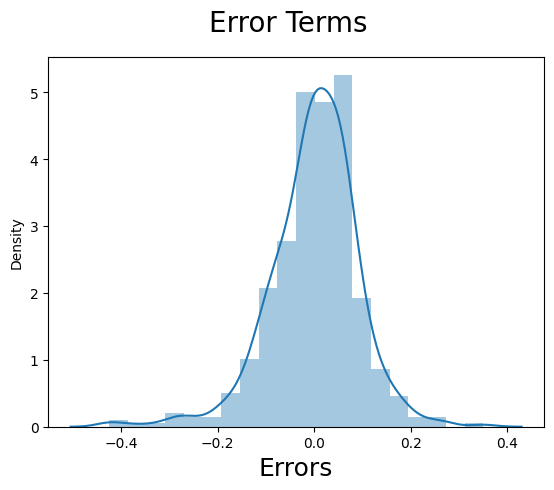

In [1470]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Observation:
-   Error terms are normally distributed.

#### Error term VS Predicted Values

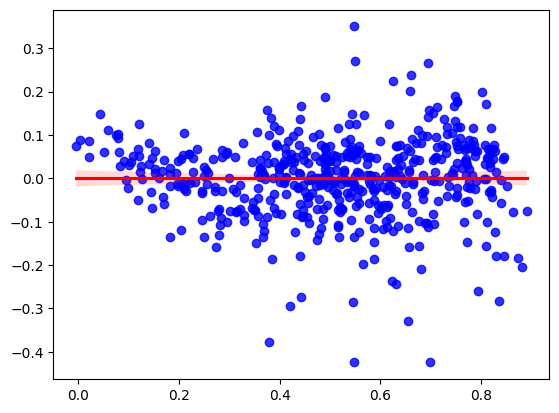

In [1471]:
# Plotting the regplot for train_pred vs residuals
sns.regplot(x=y_train_pred, y=residuals, scatter_kws={
            "color": "blue"}, line_kws={"color": "red"})
plt.show()


## Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [1472]:
# Creating numeric variable list
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

# Apply the scalling
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Let's check the test set after scalling
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow_Light-Rain-Thunderstorm,weathersit_Mist-Cloudy_Mist-Broken
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [1473]:
# Crealting X and y test dataset from df_test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [1474]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping the insignificant variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_lm = sm.add_constant(X_test_new)

In [1475]:
# Making predictions
y_pred = lm5.predict(X_test_lm)

In [1476]:
# let's see the predicted values
y_pred

184    0.462645
535    0.864108
299    0.402660
221    0.581588
152    0.530629
         ...   
400    0.343528
702    0.733502
127    0.475921
640    0.760301
72     0.284473
Length: 219, dtype: float64

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

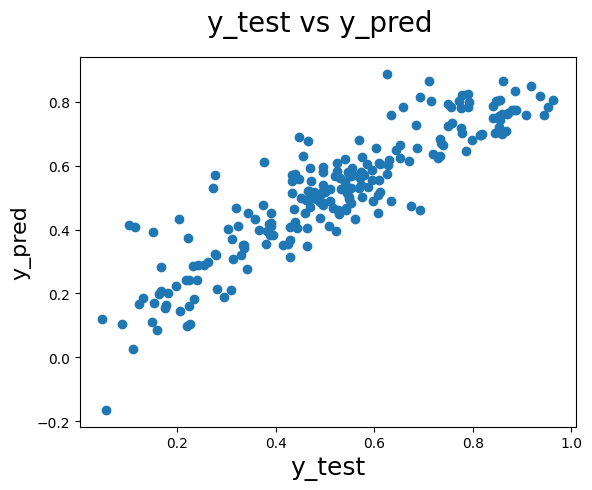

In [1477]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label
plt.show()          

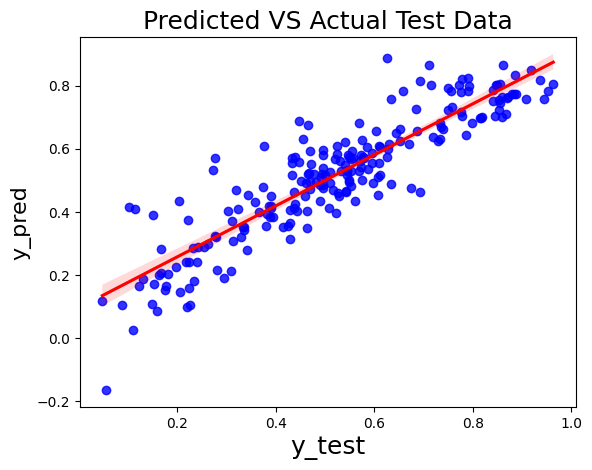

In [1478]:
# Plotting y_test and y_pred using sns 
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.title('Predicted VS Actual Test Data', fontdict={'fontsize': 18}) # Heading
plt.show()

#### R-squared score on the test set.

In [1479]:
# let's caculate the r-squared 
r2_test = r2_score(y_test, y_pred)
r2_test


0.8067922278856641

#### Adjusted R Squaired on test set

In [1480]:
# let's caculate the adjusted r-squared 
adj_r2 = round(
    1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1), 3)
print(adj_r2)


0.778


#### Equation for best fit line :

In [1481]:
# Coefficent for the variables
round(lm5.params, 3)

const                                            0.274
yr                                               0.236
atemp                                            0.445
windspeed                                       -0.136
season_spring                                   -0.109
season_winter                                    0.034
mnth_January                                    -0.044
mnth_July                                       -0.062
mnth_September                                   0.056
weekday_Sunday                                  -0.045
weathersit_Light-Snow_Light-Rain-Thunderstorm   -0.284
weathersit_Mist-Cloudy_Mist-Broken              -0.081
dtype: float64

Equation

> `cnt = 0.274 + (0.236*yr + 0.445*atemp - 0.136*windspeed - 0.109*season_spring +  0.034*season_winter - 0.044*mnth_January - 0.062*mnth_July + 0.056*mnth_September - 0.045*weekday_Sunday - 0.284*weathersit_Light-Snow_Light-Rain-Thunderstorm - 0.081*weathersit_Mist-Cloudy_Mist-Broken)`